In [2]:
from dataset.mnist import load_mnist
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# パラメータの指定
batch_size = 100     # ミニバッチのサイズ
iters_num = 10000    # イテレーション回数
learning_rate = 0.1  # 学習率

input_size = 784     # 入力数（784要素あるため、784個）
hidden_size = 50     # 隠れ層のサイズ：50と仮定
output_size = 10     # 出力層：10　one-hotエンコーディングで0～9を割り当て
weight_init_std=0.01 # 重みに対してかける定数

In [4]:
# MNISTデータセットの取得
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


※5をone-hotエンコーディングで表している


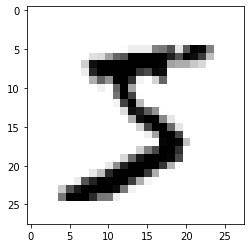

In [6]:
# MNISTデータセットを表示してみる。
img = x_train[0].reshape(28, 28)
#print(x_train[0])
print('※5をone-hotエンコーディングで表している')
plt.imshow(img, cmap=plt.cm.gray_r)

In [5]:
# 28*28の二次元データを784個(28*28)の要素を持つ1次元データとして格納している。
#また、色の濃さは0～1までの数字で保存されている。（0が白、1が黒）
x_train[0].shape

(784,)

In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [7]:
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def predict(x, params):
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [10]:
def loss(x, t, params):
    y = predict(x, params)

    return cross_entropy_error(y, t)

In [ ]:
# 誤差逆伝播法でパラメータの更新を行う。

In [13]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [33]:
train_size = x_train.shape[0]
batch_size = 100     # ミニバッチのサイズ
iters_num = 10001   # イテレーション回数
learning_rate = 0.1  # 学習率

input_size = 784     # 入力数（784要素あるため、784個）
hidden_size = 50     # 隠れ層のサイズ：50と仮定
output_size = 10     # 出力層：10　one-hotエンコーディングで0～9を割り当て
weight_init_std=0.01 # 重みに対してかける定数

params = {}
params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
params['b1'] = np.zeros(hidden_size)
params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
params['b2'] = np.zeros(output_size)

# 損失関数と誤差を保持する配列
train_loss = []
train_accuracy = []
test_accuracy = []
iters = []

for i in range(iters_num):
    # ミニバッチの取得

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配の計算
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    grads = {}

    batch_num = x_batch.shape[0]

    # forward
    a1 = np.dot(x_batch, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    # backward
    dy = (y - t_batch) / batch_num
    grads['W2'] = np.dot(z1.T, dy)
    grads['b2'] = np.sum(dy, axis=0)

    dz1 = np.dot(dy, W2.T)
    da1 = (1.0 - sigmoid(a1)) * sigmoid(a1) * dz1
    grads['W1'] = np.dot(x_batch.T, da1)
    grads['b1'] = np.sum(da1, axis=0)

    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        params[key] -= learning_rate * grads[key]
    if i % 100 == 0:
        train_acc = accuracy(x_train, t_train, params)
        test_acc = accuracy(x_test, t_test, params)
        #print('{}回目:{}'.format(i,loss(x_batch, t_batch, params)))
        train_loss.append(loss(x_batch, t_batch, params))
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        iters.append(i)

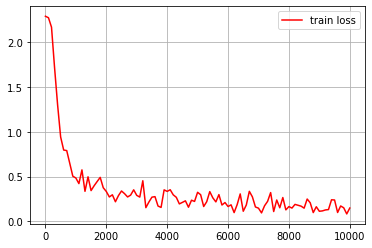

In [34]:
plt.plot(iters, train_loss, color = "red", linestyle = "solid" ,label = 'train loss')
plt.legend()
plt.grid()

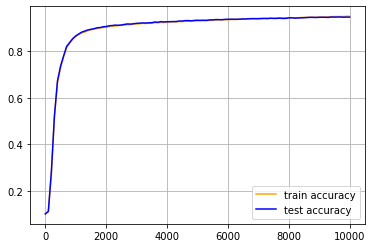

In [35]:
plt.plot(iters, train_accuracy, color = "orange", linestyle = "solid" , label= 'train accuracy')
plt.plot(iters, test_accuracy, color = "blue", linestyle = "solid" , label= 'test accuracy')
plt.legend()
plt.grid()

In [36]:
train_acc = accuracy(x_train, t_train, params)
test_acc = accuracy(x_test, t_test, params)
print(train_acc) # 0.9486
print(test_acc)  # 0.9448

0.9486333333333333
0.9448
